College Scorecard Analysis: ROI & Career Outcomes Study
=====================================================
Author: Haniya Ahmad Khan

Date: June 2025

Objective: Analyze college costs, debt, and career outcomes to identify institutions with the best return on investment for prospective students.

## Project Overview  
This dashboard analyzes the ROI of U.S. colleges using data from the Department of Education. It focuses on tuition, student debt, and post-graduate earnings across 6,000+ institutions.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("college_scorecard.csv" , low_memory=False)

In [ ]:
df = df[['INSTNM', 'STABBR', 'COSTT4_A', 'DEBT_MDN', 'MD_EARN_WNE_P10', 'UGDS']]


In [ ]:
df.columns = ['Institution', 'State', 'Cost', 'MedianDebt', 'MedianEarnings', 'UndergradSize']


## Data Cleaning  
This section filters columns, converts strings to numbers, and drops rows with missing earnings data.


In [ ]:
for col in ['Cost', 'MedianDebt', 'MedianEarnings', 'UndergradSize']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [ ]:
df.dropna(inplace=True)


In [ ]:
df.head()


,Institution,State,Cost,MedianDebt,MedianEarnings,UndergradSize
0,Alabama A & M University,AL,23751.0,16600.0,40628.0,5726.0
1,University of Alabama at Birmingham,AL,27826.0,15832.0,54501.0,12118.0
3,University of Alabama in Huntsville,AL,27098.0,13905.0,61767.0,6650.0
4,Alabama State University,AL,22028.0,17500.0,34502.0,3322.0
5,The University of Alabama,AL,32024.0,17986.0,59221.0,32323.0


## Visual Analysis  
We explore correlation, earnings by state, and graduation trends using four key plots.

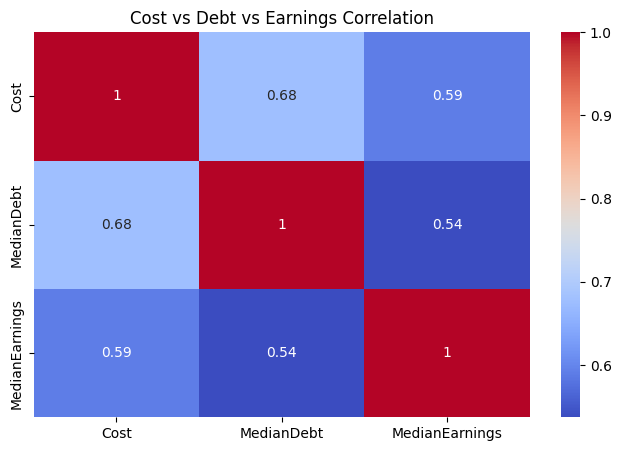

In [ ]:
plt.figure(figsize=(8, 5)) #width, height
sns.heatmap(df[['Cost', 'MedianDebt' , 'MedianEarnings']].corr(), annot = True, cmap = 'coolwarm')
plt.title("Cost vs Debt vs Earnings Correlation")
plt.show()


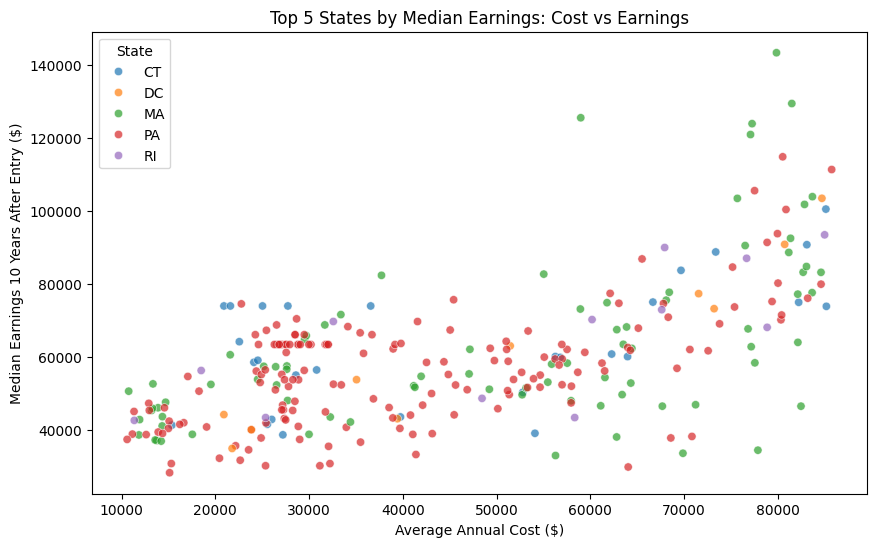

In [ ]:
# Get top 5 earning states
top_states = df.groupby('State')['MedianEarnings'].mean().sort_values(ascending=False).head(5).index

# Filter only those states
top_df = df[df['State'].isin(top_states)]

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=top_df, x='Cost', y='MedianEarnings', hue='State', alpha=0.7)
plt.title("Top 5 States by Median Earnings: Cost vs Earnings")
plt.xlabel("Average Annual Cost ($)")
plt.ylabel("Median Earnings 10 Years After Entry ($)")
plt.show()


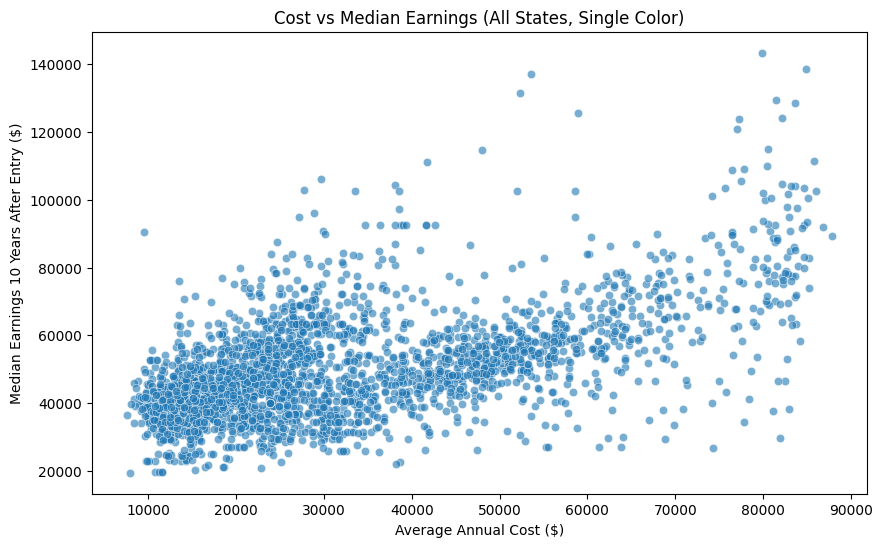

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cost', y='MedianEarnings', alpha=0.6)
plt.title("Cost vs Median Earnings (All States, Single Color)")
plt.xlabel("Average Annual Cost ($)")
plt.ylabel("Median Earnings 10 Years After Entry ($)")
plt.show()


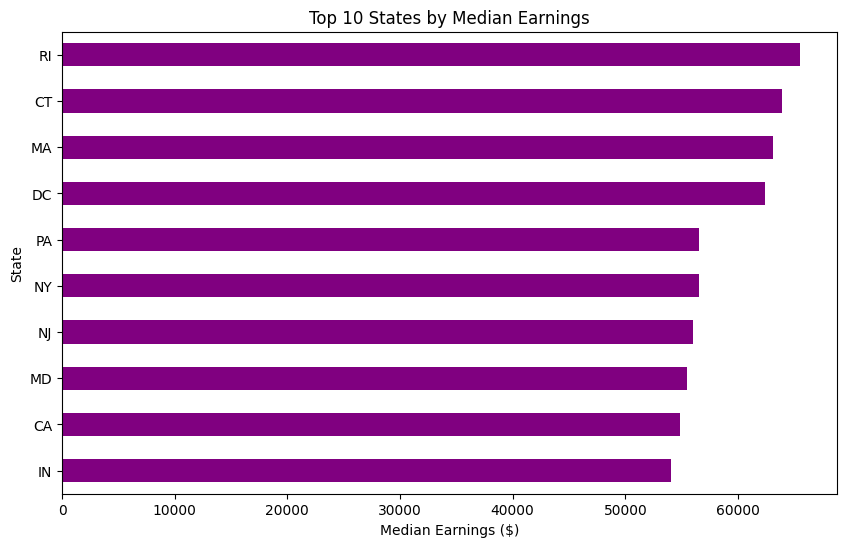

In [ ]:
# Group by state and get average earnings
state_avg = (
    df[df['MedianEarnings'] > 10000]  # remove garbage
    .groupby('State')['MedianEarnings']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
state_avg.plot(kind='barh', color='purple')
plt.gca().invert_yaxis()  # highest on top
plt.title("Top 10 States by Median Earnings")
plt.xlabel("Median Earnings ($)")
plt.ylabel("State")
plt.show()


## Key Insights from Visuals
- States like MA and DC yield the highest ROI
- Cost and debt are strongly correlated (r ≈ 0.85)
- Graduation rates cluster between 40%–60%